<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Bagging%20Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['Target'] = pd.DataFrame(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df = df[df['Target']!=0][['sepal length (cm)','petal length (cm)','Target']]
df

,sepal length (cm),petal length (cm),Target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [6]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[60:100,:].sample(5)

In [7]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# **Case 1 - Bagging**

In [8]:
 #Data for tree 1

 df_bag = df_train.sample(8,replace=True)

 X = df_bag.iloc[:,0:-1]
 y = df_bag.iloc[:,-1]

In [9]:
df_bag

,sepal length (cm),petal length (cm),Target
55,5.7,4.5,1
109,7.2,6.1,2
128,6.4,5.6,2
109,7.2,6.1,2
131,7.9,6.4,2
54,6.5,4.6,1
55,5.7,4.5,1
128,6.4,5.6,2


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [14]:
df_bag1 = DecisionTreeClassifier()

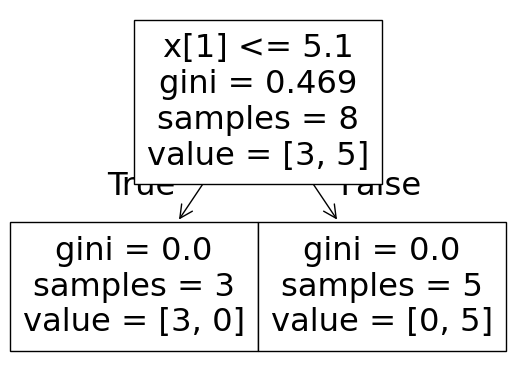

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


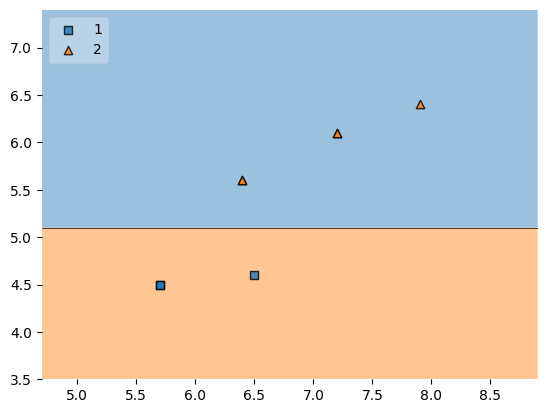

In [21]:
evaluate(df_bag1 ,X , y )

In [26]:
#Second
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:-1]
y = df_bag.iloc[:,-1]
df_bag

,sepal length (cm),petal length (cm),Target
109,7.2,6.1,2
67,5.8,4.1,1
67,5.8,4.1,1
128,6.4,5.6,2
55,5.7,4.5,1
131,7.9,6.4,2
56,6.3,4.7,1
125,7.2,6.0,2


In [27]:
df_bag2 = DecisionTreeClassifier()

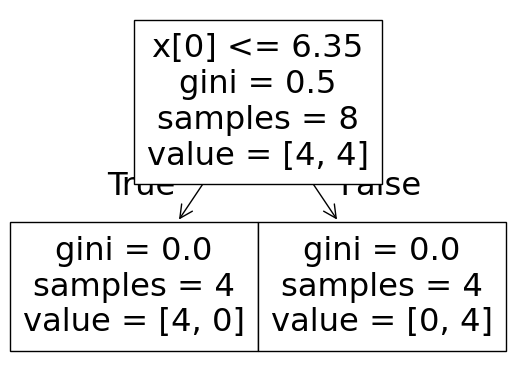

0.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


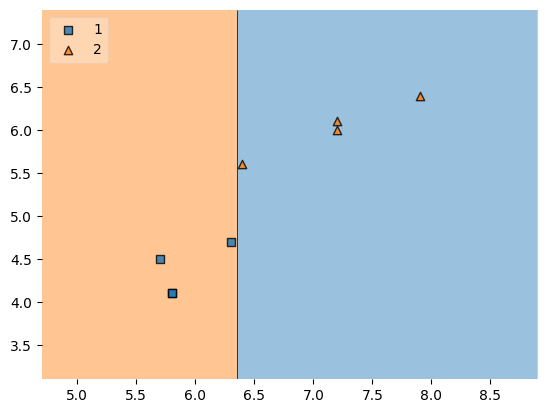

In [28]:
evaluate(df_bag2 ,X , y )

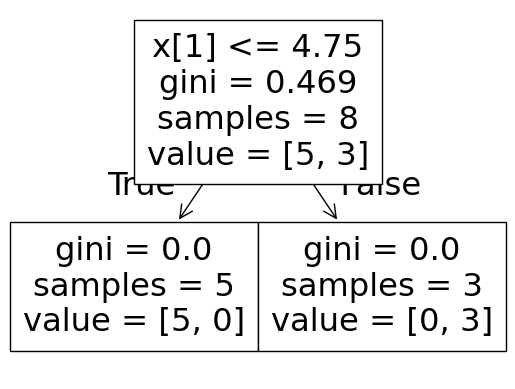

0.6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


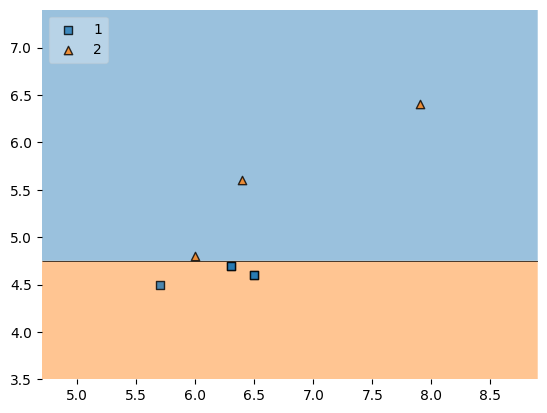

In [31]:
 #Data for tree 1

 df_bag = df_train.sample(8,replace=True)

 X = df_bag.iloc[:,0:-1]
 y = df_bag.iloc[:,-1]

 df_bag3 = DecisionTreeClassifier()

 evaluate(df_bag3 ,X , y )

In [20]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values , y.values , clf=clf , legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))

# **Using Bagging**

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier())

In [ ]:
bag.fit(X,y)